# Data analysis final project - Diabetes

## Exploratory Data Analysis (EDA)

   Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0            6      148             72             35        0  33.6   
1            1       85             66             29        0  26.6   
2            8      183             64              0        0  23.3   
3            1       89             66             23       94  28.1   
4            0      137             40             35      168  43.1   

   DiabetesPedigreeFunction  Age  Outcome  
0                     0.627   50        1  
1                     0.351   31        0  
2                     0.672   32        1  
3                     0.167   21        0  
4                     2.288   33        1  
       Pregnancies     Glucose  BloodPressure  SkinThickness     Insulin  \
count   768.000000  768.000000     768.000000     768.000000  768.000000   
mean      3.845052  120.894531      69.105469      20.536458   79.799479   
std       3.369578   31.972618      19.355807      15.952218  115.244002   

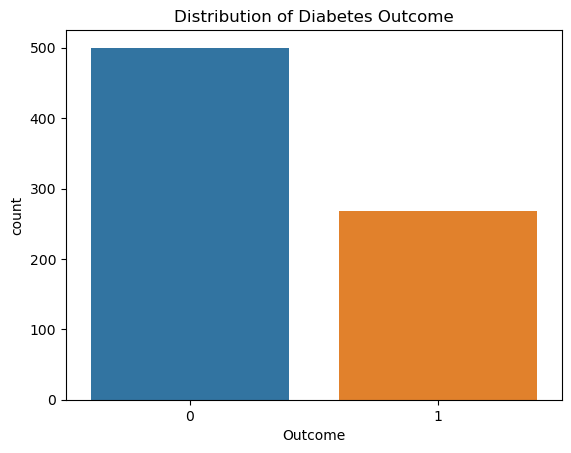

In [48]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Load the dataset
data = pd.read_csv("C:\\Users\\adria\\OneDrive\\Desktop\\Diabetes\\Diabetes\\diabetes.csv")

# Display the first few rows of the dataset
print(data.head())

# Summary statistics of the dataset
print(data.describe())

# Checking for missing values
print(data.isnull().sum())

# Visualizing the distribution of target variable
sns.countplot(x='Outcome', data=data)
plt.title('Distribution of Diabetes Outcome')
plt.show()



## Data Cleaning

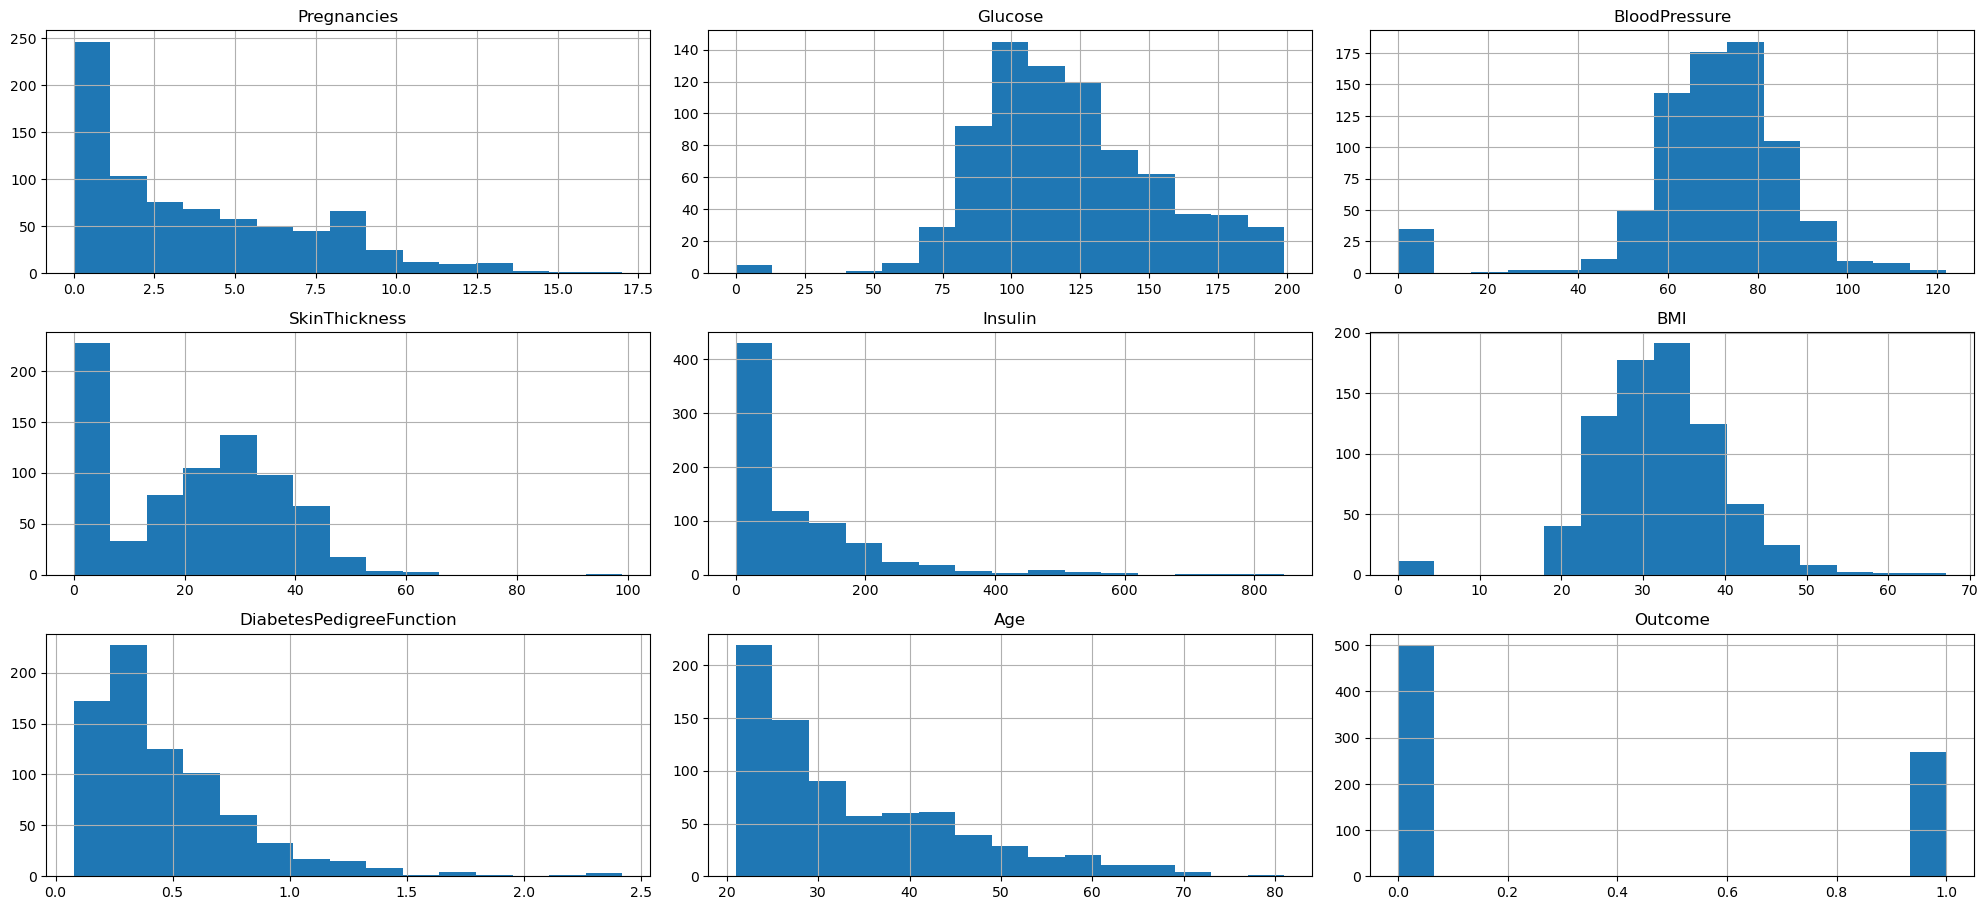

In [49]:
# Visualizing the distribution of features
data.hist(bins=15, figsize=(20, 15), layout=(5, 3))
plt.tight_layout()
plt.show()

## Split the Data

In [50]:
from sklearn.model_selection import train_test_split

# Splitting the dataset into features and target variable
X = data.drop('Outcome', axis=1)
y = data['Outcome']

# Splitting the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)


## Build and Train the Model

In [51]:
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier

# Standardizing the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Building the KNN model
knn = KNeighborsClassifier()
knn.fit(X_train_scaled, y_train)

# Initial prediction to check model performance before tuning
y_pred_initial = knn.predict(X_test_scaled)
print("Initial Accuracy: ", accuracy_score(y_test, y_pred_initial))


Initial Accuracy:  0.7012987012987013


## Hyperparameter Tuning

In [52]:
from sklearn.model_selection import GridSearchCV

# Using GridSearchCV to find the best hyperparameters
param_grid = {'n_neighbors': range(1, 31), 'weights': ['uniform', 'distance'], 'metric': ['euclidean', 'manhattan']}
grid_search = GridSearchCV(knn, param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train_scaled, y_train)

# Best parameters found by GridSearchCV
print("Best parameters found: ", grid_search.best_params_)


Best parameters found:  {'metric': 'manhattan', 'n_neighbors': 15, 'weights': 'uniform'}


## Model Evaluation with Best Parameters

Classification Report with Best Parameters:
               precision    recall  f1-score   support

           0       0.79      0.88      0.83       100
           1       0.72      0.57      0.64        54

    accuracy                           0.77       154
   macro avg       0.76      0.73      0.74       154
weighted avg       0.77      0.77      0.77       154

Confusion Matrix with Best Parameters:
 [[88 12]
 [23 31]]
Accuracy Score with Best Parameters:  0.7727272727272727


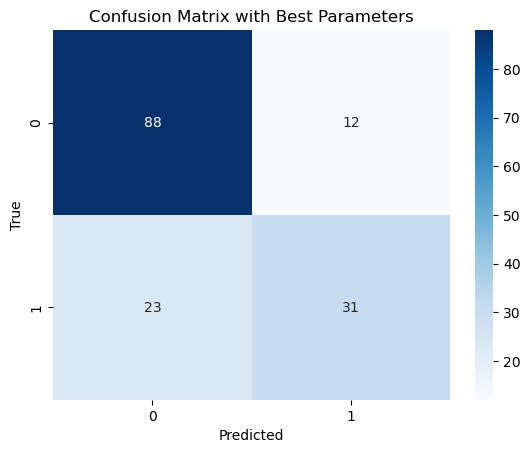

In [53]:
# Best estimator
best_knn = grid_search.best_estimator_

# Predicting the test set results with the best model
y_pred = best_knn.predict(X_test_scaled)

# Classification report and confusion matrix
print("Classification Report with Best Parameters:\n", classification_report(y_test, y_pred))
print("Confusion Matrix with Best Parameters:\n", confusion_matrix(y_test, y_pred))
print("Accuracy Score with Best Parameters: ", accuracy_score(y_test, y_pred))

# Plotting confusion matrix
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix with Best Parameters')
plt.show()


## Classifying New Individuals

In [54]:
# Example new individuals' data
new_data = pd.DataFrame({
    'Pregnancies': [2, 8],
    'Glucose': [130, 160],
    'BloodPressure': [70, 80],
    'SkinThickness': [20, 30],
    'Insulin': [80, 100],
    'BMI': [25.6, 28.4],
    'DiabetesPedigreeFunction': [0.627, 0.45],
    'Age': [45, 50]
})

# Standardize the new data using the previously fitted scaler
new_data_scaled = scaler.transform(new_data)

# Predict the outcome for new individuals
new_predictions = best_knn.predict(new_data_scaled)
new_data['Predicted_Outcome'] = new_predictions

print(new_data)

# Save the final model
import joblib
joblib.dump(best_knn, 'best_knn_model.pkl')

   Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0            2      130             70             20       80  25.6   
1            8      160             80             30      100  28.4   

   DiabetesPedigreeFunction  Age  Predicted_Outcome  
0                     0.627   45                  0  
1                     0.450   50                  1  


['best_knn_model.pkl']